In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MaxAbsScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [26]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price
0,0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50
2,2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50
3,3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74


In [27]:
cat_cols = ['Transmission']
num_cols = ['Engine CC','Power','Seats','Mileage Km/L','Price']

In [28]:
scale = MaxAbsScaler()
enc = LabelEncoder()


df_processed = pd.DataFrame(scale.fit_transform(df[num_cols]),columns = num_cols)

In [29]:
df_processed['Transmission'] = enc.fit_transform(df['Transmission']);

In [30]:
df_processed.head()

,Engine CC,Power,Seats,Mileage Km/L,Price,Transmission
0,0.166389,0.103857,0.5,0.793083,0.010937,1
1,0.263755,0.225357,0.5,0.586464,0.078125,1
2,0.199900,0.158393,0.5,0.542636,0.028125,1
3,0.208069,0.158500,0.7,0.619261,0.037500,1
4,0.328109,0.251429,0.5,0.453190,0.110875,0


In [55]:
X = df_processed
pca = PCA()
pca.fit(X)

pd.DataFrame({'Standard Deviation':np.sqrt(pca.explained_variance_),
'Proportion of Variance':np.array(pca.explained_variance_ratio_),
'Cumulative Proportion':np.array(np.cumsum(pca.explained_variance_ratio_))
},
index =['PC1',"PC2",'PC3','PC4','PC5','PC6'])

,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,0.464085,0.850959,0.850959
PC2,0.149013,0.087733,0.938692
PC3,0.088644,0.031046,0.969738
PC4,0.072596,0.020823,0.990561
PC5,0.040514,0.006485,0.997046
PC6,0.027343,0.002954,1.000000


In [56]:
pd.DataFrame(pca.components_.T,index = X.columns[:11],
columns =['PC1',"PC2",'PC3','PC4','PC5','PC6'])

,PC1,PC2,PC3,PC4,PC5,PC6
Engine CC,0.119529,0.460035,0.462333,-0.030963,-0.425841,0.614842
Power,0.142210,0.304681,0.481492,0.306211,-0.180388,-0.727191
Seats,-0.008476,0.305190,0.101369,-0.902429,0.171900,-0.229312
Mileage Km/L,-0.113606,-0.738475,0.622665,-0.204718,-0.108059,0.021258
Price,0.093342,0.133945,0.384979,0.201234,0.862937,0.199954
Transmission,-0.971493,0.197764,0.090656,0.092162,0.015249,-0.012074


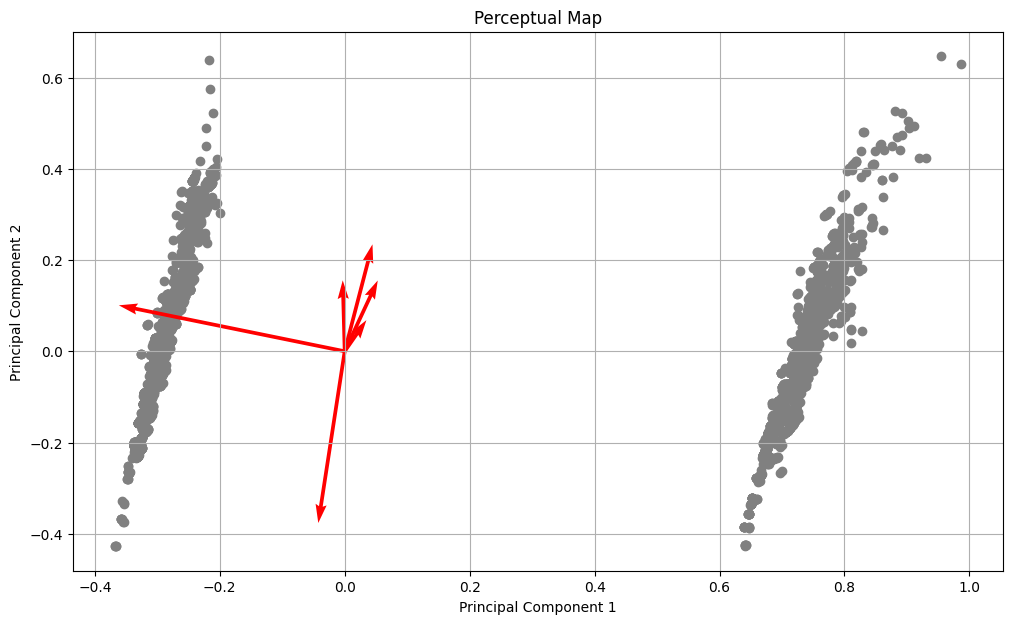

In [61]:
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)
cols=X.columns
plt.figure(figsize=(12,7))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Perceptual Map')
plt.grid(True)
origin = [0, 0]
i=0
for component in pca.components_.T:
  plt.quiver(*origin, component[0], component[1], color='red', scale=4,width=0.004)
  i+=1


plt.show()

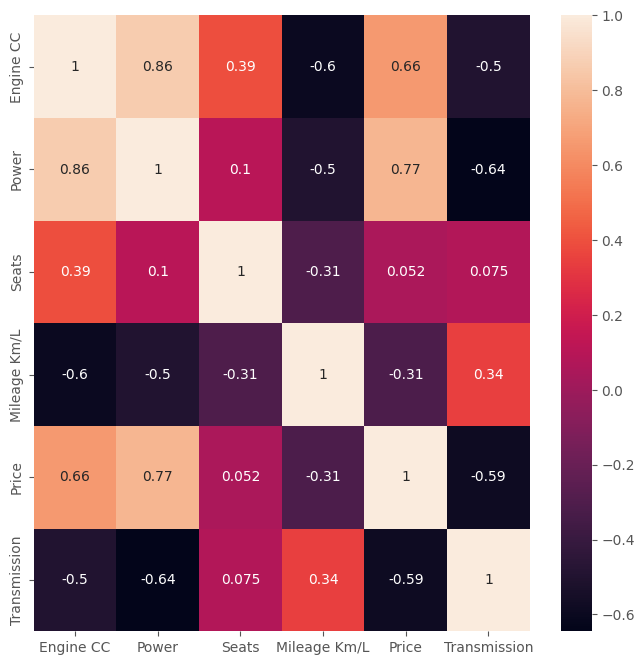

In [71]:
plt.figure(figsize=(8,8))
sns.heatmap(X.corr(),annot=True);

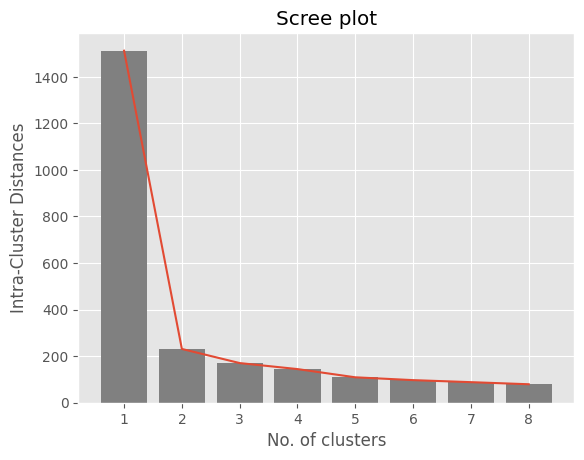

In [68]:
intra_distance = []
clusters=[i for i in range(1,9)]
for cluster in clusters:
  kmeans = KMeans(n_clusters = cluster, n_init = 'auto',random_state=42)
  kmeans.fit(X)
  intra_distance.append(kmeans.inertia_)
plt.style.use('ggplot')
plt.bar(x=clusters,height=intra_distance,color='grey')
plt.xlabel('No. of clusters')
plt.ylabel('Intra-Cluster Distances')
plt.title('Scree plot')
plt.plot(clusters,intra_distance);

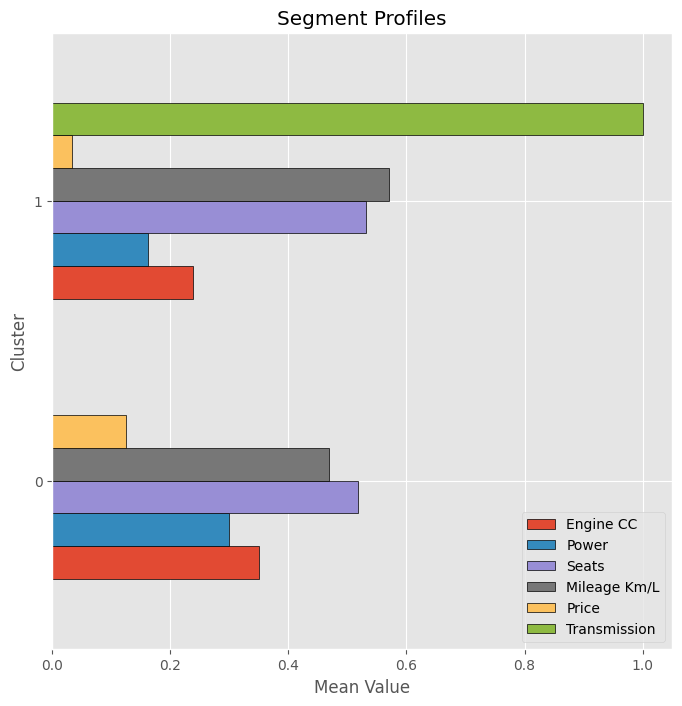

In [72]:
#segment profiling
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=32)
kmeans.fit(X)
X_lab=X.copy()
X_lab['clusters']=kmeans.labels_
seg_profile = X_lab.groupby('clusters').mean()
seg_profile.plot(kind='barh' , width=0.7, figsize=(8,8), edgecolor='black')
plt.ylabel('Cluster')
plt.xlabel('Mean Value')
plt.title('Segment Profiles')
plt.legend(loc='best')
plt.show()